In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = """min t | crash | 0.3542349612104814
min t | ppl i | 0.5845531013122958
min t | ppl k | 0.06555856724944638
min t | ped i | -0.10957094526853005
min t | ped k | -0.0325904308110889
min t | cyc i | 0.7006555559562513
min t | cyc k | 0.08358547262405314
min t | mot i | 0.5078443081139264
min t | mot k | 0.06505212655867684
min t | sub | 0.15665129779988143
min t | bus | 0.15585644526428835
min t | lirr | 0.28781195444582247
min t | metro-north | 0.2966600862340946
min t | acc-a-ride | 0.21554602392510638
min t | brdg-tun | 0.5531898281779136
min t | sttn-rw | 0.06093589600393726
max t | crash | 0.3775524659461287
max t | ppl i | 0.5873874719402673
max t | ppl k | 0.06991272743973675
max t | ped i | -0.10438022617856996
max t | ped k | -0.0365920482021427
max t | cyc i | 0.7164812533752206
max t | cyc k | 0.07468591171200567
max t | mot i | 0.501088612228785
max t | mot k | 0.07156851827297922
max t | sub | 0.149338209946429
max t | bus | 0.1649199672017819
max t | lirr | 0.26739684068142056
max t | metro-north | 0.2683582895085974
max t | acc-a-ride | 0.2031368815097832
max t | brdg-tun | 0.5585861740373308
max t | sttn-rw | 0.06673901553308353
avg t | crash | 0.3740278937117881
avg t | ppl i | 0.5993700459776434
avg t | ppl k | 0.0649174768963727
avg t | ped i | -0.10055736202566946
avg t | ped k | -0.040871322887430166
avg t | cyc i | 0.7139599127099249
avg t | cyc k | 0.07813018163005453
avg t | mot i | 0.5176437137553311
avg t | mot k | 0.06734373076365609
avg t | sub | 0.1554857540309108
avg t | bus | 0.16216227527127997
avg t | lirr | 0.28318119184970664
avg t | metro-north | 0.288738789089319
avg t | acc-a-ride | 0.21290247245431296
avg t | brdg-tun | 0.5610241926660134
avg t | sttn-rw | 0.06597694097160062
Sunrise | crash | -0.4193857672323521
Sunrise | ppl i | -0.5005892246916367
Sunrise | ppl k | -0.030772896092594874
Sunrise | ped i | 0.23949334271230252
Sunrise | ped k | 0.07148125936548586
Sunrise | cyc i | -0.612846456085375
Sunrise | cyc k | -0.10198832597113647
Sunrise | mot i | -0.49662676331137834
Sunrise | mot k | -0.057525478340458666
Sunrise | sub | -0.09370342965369291
Sunrise | bus | -0.14190918218131582
Sunrise | lirr | -0.18587951558216328
Sunrise | metro-north | -0.18310994171489725
Sunrise | acc-a-ride | -0.1325261980444854
Sunrise | brdg-tun | -0.5336543366433003
Sunrise | sttn-rw | -0.03653948160503098
Sunset | crash | 0.36832812726077524
Sunset | ppl i | 0.4174632430849236
Sunset | ppl k | 0.018444473955051242
Sunset | ped i | -0.27946130915414974
Sunset | ped k | -0.09606087264597117
Sunset | cyc i | 0.5142780005356611
Sunset | cyc k | 0.09478384204458541
Sunset | mot i | 0.44443231785421555
Sunset | mot k | 0.06647289134065691
Sunset | sub | 0.0025402718390077654
Sunset | bus | 0.09080597476872293
Sunset | lirr | 0.08988839865275147
Sunset | metro-north | 0.054975858069086905
Sunset | acc-a-ride | 0.04907194339823081
Sunset | brdg-tun | 0.42628235099576584
Sunset | sttn-rw | -0.01026206856407811
"""



In [6]:
records = [r.split(' | ') for r in data.splitlines()]
records = [(r[0], r[1], float(r[2])) for r in records]
records

[('min t', 'crash', 0.3542349612104814),
 ('min t', 'ppl i', 0.5845531013122958),
 ('min t', 'ppl k', 0.06555856724944638),
 ('min t', 'ped i', -0.10957094526853005),
 ('min t', 'ped k', -0.0325904308110889),
 ('min t', 'cyc i', 0.7006555559562513),
 ('min t', 'cyc k', 0.08358547262405314),
 ('min t', 'mot i', 0.5078443081139264),
 ('min t', 'mot k', 0.06505212655867684),
 ('min t', 'sub', 0.15665129779988143),
 ('min t', 'bus', 0.15585644526428835),
 ('min t', 'lirr', 0.28781195444582247),
 ('min t', 'metro-north', 0.2966600862340946),
 ('min t', 'acc-a-ride', 0.21554602392510638),
 ('min t', 'brdg-tun', 0.5531898281779136),
 ('min t', 'sttn-rw', 0.06093589600393726),
 ('max t', 'crash', 0.3775524659461287),
 ('max t', 'ppl i', 0.5873874719402673),
 ('max t', 'ppl k', 0.06991272743973675),
 ('max t', 'ped i', -0.10438022617856996),
 ('max t', 'ped k', -0.0365920482021427),
 ('max t', 'cyc i', 0.7164812533752206),
 ('max t', 'cyc k', 0.07468591171200567),
 ('max t', 'mot i', 0.50108861

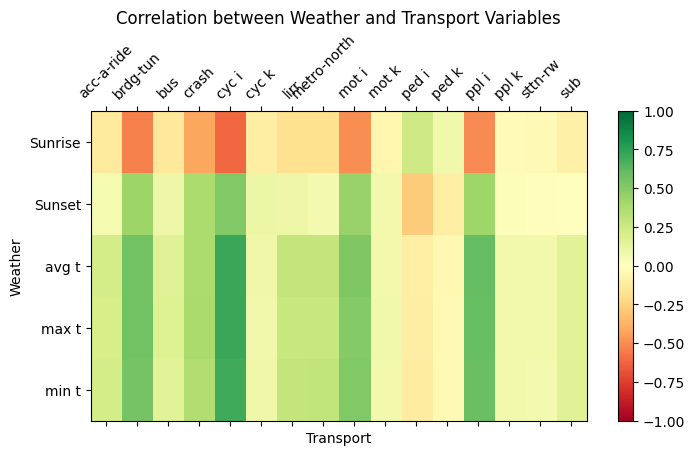

In [20]:
weather_vars = sorted(set([item[0] for item in records]))
transport_vars = sorted(set([item[1] for item in records]))
correlation_matrix = np.zeros((len(weather_vars), len(transport_vars)))

for item in records:
    weather_idx = weather_vars.index(item[0])
    transport_idx = transport_vars.index(item[1])
    correlation_matrix[weather_idx, transport_idx] = item[2]


# Reshape the data into a 2D array (matrix)
# Plotting using matshow
plt.figure(figsize=(8, 4))
plt.matshow(correlation_matrix, fignum=1, cmap='RdYlGn', vmin=-1.0, vmax=1.0, aspect='auto')

# Setting x-ticks
plt.xticks(ticks=range(len(transport_vars)), labels=transport_vars, rotation=45)
plt.yticks(ticks=range(len(weather_vars)), labels=weather_vars)

# Adding color bar for reference
plt.colorbar()

# Adding title and labels
plt.title('Correlation between Weather and Transport Variables')
plt.xlabel('Transport')
plt.ylabel('Weather')

plt.show()